# Телеком — Поиск клиента с неоптимальными тарифами.

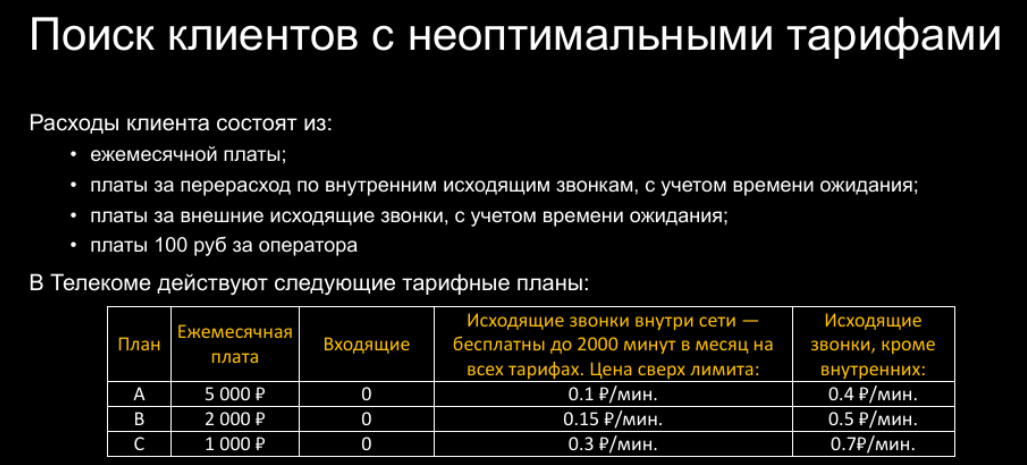

# Описание данных:
Датасеты содержат данные об использовании услуг виртуальной телефонии «Нупозвони». Клиентами "Нупозвони" являются организации, которым нужно распределять множество входящих вызовов на различных операторов, либо осуществлять исходящие вызовы силами операторов.Также операторы могут осуществлять внутренние вызовы, то есть вызовы друг между другом, которые осуществляются внутри сети виртуальной телефонии.

telecom_dataset.csv.zip:

- user_id — идентификатор клиента,
- date — дата статистики,
- direction — направление вызовов: out - исходящий вызов, in— входящий вызов,
- internal — маркер внутренних и внешних вызовов,
- operator_id — идентификатор оператора,
- is_missed_call — маркер пропущенных вызовов,
- calls_count — количество звонков,
- call_duration — длительность звонка без учета времени ожидания,
- total_call_duration — длительность звонка с учетом времени ожидания.

telecom_clients.csv:

- user_id — идентификатор клиента,
- tariff_plan — тарифный план клиента,
- date_start — дата регистрации клиента в сервисе.

# План

1) Изучение данных.

2) Предобработка данных.

    а) Преобразуем в нужные типы;
    
    б) Удаление дубликатов;
    
    в) Анализ пропусков;
    
    г) Разбор больших значений в столбцах с длительностью звонка.
    
3) Анализ данных.

    а) анализ по общим данным;
    
    б)просмотр ушедших клиентов;
    
    в)составление таблицы для активных клиентов;
    
    Найти клиентов,которые:

    г) переплачивают на текущих тарифах;

    д) сэкономят, если перейдут на более дорогой тариф;

    е) изучить текущую выручку компании;

    ж) изучить потери в выручке,если все клиенты перейдут на выгодные тарифы;
    
4) Вывод.

5) Дашборд набор №1

https://public.tableau.com/app/profile/.17693549/viz/_16428732638120/Dashboard1?publish=yes

6) Презентация.
https://drive.google.com/file/d/1mRTIFY0h68dW4vN6tIRQa0OEgGO2Y7uH/view?usp=sharing

## Изучение данных из файла.
Импортируем библиотеки.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', -1)
cm = sns.light_palette("red", as_cmap=True)

In [2]:
data = pd.read_csv('/datasets/telecom_dataset.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
user_id                53902 non-null int64
date                   53902 non-null object
direction              53902 non-null object
internal               53785 non-null object
operator_id            45730 non-null float64
is_missed_call         53902 non-null bool
calls_count            53902 non-null int64
call_duration          53902 non-null int64
total_call_duration    53902 non-null int64
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB


In [3]:
data.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25


In [4]:
data.tail()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
53897,168606,2019-11-10 00:00:00+03:00,out,True,957922.0,True,1,0,38
53898,168606,2019-11-11 00:00:00+03:00,out,True,957922.0,False,2,479,501
53899,168606,2019-11-15 00:00:00+03:00,out,True,957922.0,False,4,3130,3190
53900,168606,2019-11-15 00:00:00+03:00,out,True,957922.0,False,4,3130,3190
53901,168606,2019-11-19 00:00:00+03:00,in,False,NaN,True,2,0,64


In [5]:
data.isna().sum()*100/len(data)

user_id                0.000000 
date                   0.000000 
direction              0.000000 
internal               0.217061 
operator_id            15.160847
is_missed_call         0.000000 
calls_count            0.000000 
call_duration          0.000000 
total_call_duration    0.000000 
dtype: float64

In [6]:
for row in data: 
    print(data[row].value_counts()) 

168187    2580
166658    2107
167497    1405
167626    1311
166916    1308
          ... 
168013    1   
167981    1   
166584    1   
166554    1   
168578    1   
Name: user_id, Length: 307, dtype: int64
2019-11-25 00:00:00+03:00    1220
2019-11-28 00:00:00+03:00    1198
2019-11-21 00:00:00+03:00    1186
2019-11-27 00:00:00+03:00    1180
2019-11-22 00:00:00+03:00    1176
                             ... 
2019-08-03 00:00:00+03:00    9   
2019-08-02 00:00:00+03:00    8   
2019-08-10 00:00:00+03:00    7   
2019-08-04 00:00:00+03:00    4   
2019-08-11 00:00:00+03:00    2   
Name: date, Length: 119, dtype: int64
out    31917
in     21985
Name: direction, dtype: int64
False    47621
True     6164 
Name: internal, dtype: int64
901884.0    348
901880.0    337
893804.0    325
885876.0    319
891410.0    290
           ... 
926214.0    1  
946468.0    1  
960674.0    1  
928284.0    1  
891948.0    1  
Name: operator_id, Length: 1092, dtype: int64
False    30334
True     23568
Name: is_missed

In [7]:
data.duplicated().sum()*100/len(data)

9.090571778412675

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,53902.0,167295.344477,598.883775,166377.0,166782.0,167162.0,167819.0,168606.0
operator_id,45730.0,916535.993002,21254.123136,879896.0,900788.0,913938.0,937708.0,973286.0
calls_count,53902.0,16.451245,62.917170,1.0,1.0,4.0,12.0,4817.0
call_duration,53902.0,866.684427,3731.791202,0.0,0.0,38.0,572.0,144395.0
total_call_duration,53902.0,1157.133297,4403.468763,0.0,47.0,210.0,902.0,166155.0


Датасет состоит из 9 столбцов и 53902 строк. Пропущенные значения в operator_id(15.16%) и internal(0.22%), полных дубликатов 9%, нулей call_duration(23263) и total_call_duration(1320).Преобразовать в нужные типы данных,убрать часовой пояс,убрать дубликаты,посмотреть на пропуски и нули.В столбце call_duration большие значения => посмотреть.

In [9]:
clients = pd.read_csv('/datasets/telecom_clients.csv')
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
user_id        732 non-null int64
tariff_plan    732 non-null object
date_start     732 non-null object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB


In [10]:
clients.head()

,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16


In [11]:
clients.tail()

,user_id,tariff_plan,date_start
727,166554,B,2019-08-08
728,166911,B,2019-08-23
729,167012,B,2019-08-28
730,166867,B,2019-08-22
731,166565,B,2019-08-08


In [12]:
clients.isna().sum()*100/len(clients)

user_id        0.0
tariff_plan    0.0
date_start     0.0
dtype: float64

In [13]:
for row in clients: 
    print(clients[row].value_counts()) 

166926    1
168227    1
166377    1
168284    1
168281    1
         ..
167580    1
166555    1
167981    1
168601    1
167936    1
Name: user_id, Length: 732, dtype: int64
C    395
B    261
A    76 
Name: tariff_plan, dtype: int64
2019-09-24    24
2019-10-09    20
2019-10-07    19
2019-08-29    18
2019-09-18    18
              ..
2019-09-21    1 
2019-09-14    1 
2019-10-19    1 
2019-10-20    1 
2019-09-01    1 
Name: date_start, Length: 73, dtype: int64


In [14]:
clients.duplicated().sum()*100/len(clients)

0.0

In [15]:
clients.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,732.0,167431.927596,633.810383,166373.0,166900.75,167432.0,167973.0,168606.0


Датасет состоит из 3 столбцов и 732 строк. Пропущенных значений нет, полных дубликатов нет, нулей нет.Преобразовать в нужные типы данных.

##  Предобработка данных.

Преобразуем в нужные типы.

In [16]:
data['date'] = pd.to_datetime(data['date'], format='%Y.%m.%d')
data['date'] = pd.to_datetime(data['date'].dt.tz_convert(None))
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
user_id                53902 non-null int64
date                   53902 non-null datetime64[ns]
direction              53902 non-null object
internal               53785 non-null object
operator_id            45730 non-null float64
is_missed_call         53902 non-null bool
calls_count            53902 non-null int64
call_duration          53902 non-null int64
total_call_duration    53902 non-null int64
dtypes: bool(1), datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 3.3+ MB


In [17]:
clients['date_start'] = pd.to_datetime(clients['date_start'], format='%Y.%m.%d')
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
user_id        732 non-null int64
tariff_plan    732 non-null object
date_start     732 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 17.3+ KB


In [18]:
data['operator_id'] = data['operator_id'].astype('Int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
user_id                53902 non-null int64
date                   53902 non-null datetime64[ns]
direction              53902 non-null object
internal               53785 non-null object
operator_id            45730 non-null Int64
is_missed_call         53902 non-null bool
calls_count            53902 non-null int64
call_duration          53902 non-null int64
total_call_duration    53902 non-null int64
dtypes: Int64(1), bool(1), datetime64[ns](1), int64(4), object(2)
memory usage: 3.4+ MB


Удаляем дубликаты.

In [19]:
data = data.drop_duplicates().reset_index(drop=True)
data.duplicated().sum()*100/len(data)

0.0

Посмотрим пропуски в столбце operator_id.

In [20]:
data['operator_id'].isna().sum()

7456

In [21]:
nan = data[data['operator_id'].isna() == True]
nan.head(10)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-03 21:00:00,in,False,NaN,True,2,0,4
7,166377,2019-08-04 21:00:00,in,False,NaN,True,6,0,35
8,166377,2019-08-05 21:00:00,in,False,NaN,True,4,0,62
16,166377,2019-08-06 21:00:00,in,False,NaN,True,2,0,24
26,166377,2019-08-11 21:00:00,in,False,NaN,True,2,0,34
28,166377,2019-08-12 21:00:00,in,False,NaN,True,7,0,128
36,166377,2019-08-13 21:00:00,in,False,NaN,True,1,0,3
71,166377,2019-08-21 21:00:00,in,False,NaN,True,1,0,1
74,166377,2019-08-22 21:00:00,in,False,NaN,True,2,0,47
79,166377,2019-08-23 21:00:00,in,False,NaN,True,2,0,35


In [22]:
data[data['operator_id'].isna()]['date'].value_counts().head(10)

2019-10-27 21:00:00    128
2019-11-27 21:00:00    127
2019-11-11 21:00:00    125
2019-11-06 21:00:00    123
2019-11-25 21:00:00    123
2019-11-18 21:00:00    122
2019-11-19 21:00:00    122
2019-11-12 21:00:00    121
2019-11-24 21:00:00    121
2019-11-13 21:00:00    121
Name: date, dtype: int64

Посмотрим кто из операторов работал в день с большим числом пропусков.

In [23]:
data[data['date']=='2019-10-27 21:00:00']['operator_id'].nunique()

328

Таких оказалось 328.

In [24]:
data[data['operator_id'].isna()]['internal'].value_counts()

False    7078
True     323 
Name: internal, dtype: int64

In [25]:
data[data['operator_id'].isna()]['direction'].value_counts()

in     7270
out    186 
Name: direction, dtype: int64

In [26]:
data[data['operator_id'].isna()]['is_missed_call'].value_counts()

True     7343
False    113 
Name: is_missed_call, dtype: int64

В основном пропуски стоят в пропущенных входящих вызовах.

Посмотрим пропуски в столбце internal.

In [27]:
data['internal'].isna().sum()

110

In [28]:
nan1 = data[data['internal'].isna() == True]
nan1.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
917,166405,2019-09-17 21:00:00,in,NaN,NaN,True,1,0,59
996,166405,2019-09-30 21:00:00,in,NaN,NaN,True,1,0,1
1705,166406,2019-08-19 21:00:00,in,NaN,NaN,True,1,0,36
1761,166406,2019-09-01 21:00:00,in,NaN,879898,False,1,2,9
5645,166541,2019-09-25 21:00:00,in,NaN,908960,False,1,393,423


In [29]:
data[data['internal'].isna()]['operator_id'].value_counts()

921318    4
932798    3
919204    2
901880    2
890404    2
919164    2
919552    2
903312    2
944220    2
931458    2
919790    2
910540    1
919206    1
944222    1
919554    1
958460    1
893402    1
923526    1
944216    1
910018    1
906396    1
906406    1
940430    1
921818    1
908082    1
929424    1
958394    1
908960    1
908958    1
936110    1
935348    1
929332    1
879898    1
906400    1
905432    1
912684    1
945046    1
906294    1
952948    1
940658    1
936514    1
Name: operator_id, dtype: int64

In [30]:
data[data['internal'].isna()]['is_missed_call'].value_counts()

True     56
False    54
Name: is_missed_call, dtype: int64

In [31]:
data[data['internal'].isna()]['direction'].value_counts()

in     108
out    2  
Name: direction, dtype: int64

Почти все они входящие,половина пропущенных.Больше всего пропусков у оператора 921318(4),но в самом столбце с операторами много пропусков.

In [32]:
data = data.dropna()

In [33]:
data.isna().sum()

user_id                0
date                   0
direction              0
internal               0
operator_id            0
is_missed_call         0
calls_count            0
call_duration          0
total_call_duration    0
dtype: int64

Посмотрим большие значения в столбце call_duration.

In [34]:
data.sort_values('call_duration', ascending=False).head(10)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
6318,166582,2019-09-24 21:00:00,out,False,885876,False,1230,144395,166155
6322,166582,2019-09-25 21:00:00,out,False,885876,False,843,132206,146903
6216,166582,2019-09-11 21:00:00,out,False,885876,False,696,125286,138643
6266,166582,2019-09-17 21:00:00,out,False,885876,False,1013,121664,140050
6192,166582,2019-09-08 21:00:00,out,False,885876,False,1138,121093,141930
6367,166582,2019-10-01 21:00:00,out,False,885876,False,995,120175,137324
6434,166582,2019-10-08 21:00:00,out,False,885876,False,696,117177,129395
6208,166582,2019-09-10 21:00:00,out,False,885876,False,946,115057,132708
6278,166582,2019-09-19 21:00:00,out,False,885876,False,737,114463,127868
6328,166582,2019-09-26 21:00:00,out,False,885876,False,754,114325,127751


Значения нереальные,все они у клиента с id 166582 и у операторов 885876 и 885890.Возможно это какой-то сбой,на суммарные значения не похоже по датам не совпадает.

Посмотрим на столбец total_call_duration.

In [35]:
#call = data[data['call_duration'] > data['total_call_duration']]
#call.info()

In [36]:
data['call_duration'] = (data['call_duration']/60).apply(np.ceil).astype('int')
data['total_call_duration'] = (data['total_call_duration']/60).apply(np.ceil).astype('int')
data.sort_values('total_call_duration', ascending=False).head(10)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
6318,166582,2019-09-24 21:00:00,out,False,885876,False,1230,2407,2770
6322,166582,2019-09-25 21:00:00,out,False,885876,False,843,2204,2449
6192,166582,2019-09-08 21:00:00,out,False,885876,False,1138,2019,2366
6266,166582,2019-09-17 21:00:00,out,False,885876,False,1013,2028,2335
6216,166582,2019-09-11 21:00:00,out,False,885876,False,696,2089,2311
6367,166582,2019-10-01 21:00:00,out,False,885876,False,995,2003,2289
6208,166582,2019-09-10 21:00:00,out,False,885876,False,946,1918,2212
6298,166582,2019-09-22 21:00:00,out,False,885876,False,1436,1726,2159
6434,166582,2019-10-08 21:00:00,out,False,885876,False,696,1953,2157
6278,166582,2019-09-19 21:00:00,out,False,885876,False,737,1908,2132


Перевели столбецы в минуты.Так как рабочий день у оператора не больше 9часов(540 минут),всё что больше выбросы.(График посмотрела по дням работы оператора).

In [37]:
data.groupby(['date', 'operator_id'])['total_call_duration', 'call_duration'].sum().\
                    sort_values('total_call_duration', ascending=False).head()

,,total_call_duration,call_duration
date,operator_id,,
2019-09-24 21:00:00,885876,3168,2418
2019-09-25 21:00:00,885876,2871,2287
2019-09-08 21:00:00,885876,2683,2044
2019-09-17 21:00:00,885876,2655,2031
2019-10-01 21:00:00,885876,2591,2036


Удалим операторов,которые разговаривают больше 9 часов в день.

In [38]:
df = data.query('operator_id != (885876, 885890, 925922, 929424, 945278, 929428, 908640, 952948, 929426)')

In [39]:
df.sort_values('total_call_duration', ascending=False).head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
48109,168361,2019-11-21 21:00:00,out,False,945310,False,138,420,463
47338,168361,2019-10-27 21:00:00,out,False,945310,False,110,385,427
48060,168361,2019-11-20 21:00:00,out,False,945310,False,118,370,411
47795,168361,2019-11-12 21:00:00,out,False,945310,False,111,375,411
48073,168361,2019-11-20 21:00:00,out,False,965544,False,167,360,403


In [40]:
data['total_call_duration'].describe()

count    41491.000000
mean     22.554699   
std      79.812920   
min      0.000000    
25%      2.000000    
50%      5.000000    
75%      19.000000   
max      2770.000000 
Name: total_call_duration, dtype: float64

In [41]:
df['total_call_duration'].describe()

count    40447.000000
mean     17.215690   
std      32.374405   
min      0.000000    
25%      2.000000    
50%      5.000000    
75%      18.000000   
max      463.000000  
Name: total_call_duration, dtype: float64

-1044 значения(2.5%) и -9 операторов.Cреднее 17,медиана 5.

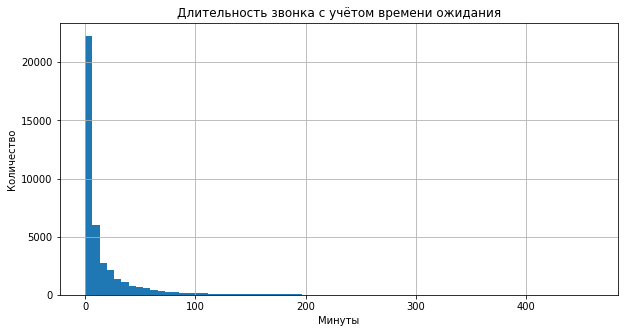

In [42]:
df.hist('total_call_duration',bins=70, range = (0, 460), figsize = (10,5))
plt.title('Длительность звонка с учётом времени ожидания')
plt.xlabel('Минуты') 
plt.ylabel('Количество')
plt.show()

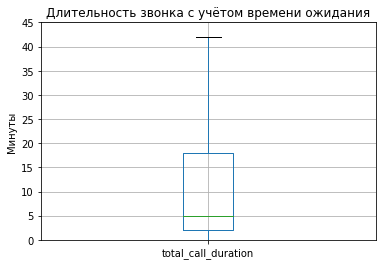

In [43]:
plt.ylim(0,45) 
df.boxplot(column = 'total_call_duration', showfliers = False)
plt.title('Длительность звонка с учётом времени ожидания')
plt.ylabel('Минуты')
plt.show()

Пик 2-20 минут,медиана 5,после 45 идут выбросы.

Добавим колонку месяц.

In [44]:
df['month'] = df['date'].astype('datetime64[M]')

In [45]:
clients['month_start'] = clients['date_start'].astype('datetime64[M]')

Преобразовали типы,убрали часовой пояс.Удалили дубликаты,пропуски.Перевели столбцы с временем в минуты.Удалили операторов,которые разговаривали аномально много.Создали столбец месяц в таблицах.

## Анализ данных.

In [46]:
display(df['date'].min())
df['date'].max()

Timestamp('2019-08-01 21:00:00')

Timestamp('2019-11-27 21:00:00')

Данные за период 2019-08-01 - 2019-11-27(почти 4 месяца)

In [47]:
clients.user_id.nunique()

732

In [48]:
clients['tariff_plan'].value_counts()

C    395
B    261
A    76 
Name: tariff_plan, dtype: int64

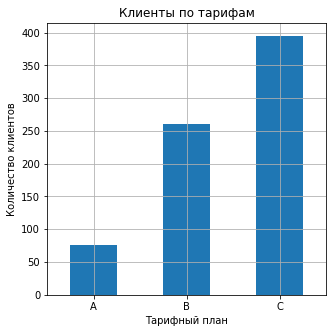

In [49]:
id_tariff = clients.groupby('tariff_plan').agg({'user_id':'nunique'})
ax = id_tariff.plot(kind='bar', figsize=(5, 5), legend=False, grid=True)
plt.xticks(rotation=0)
plt.title('Клиенты по тарифам')
plt.xlabel('Тарифный план') 
plt.ylabel('Количество клиентов')
plt.show()

Лидер по количеству клиентов тариф С(395),потом В(261) и С(76).

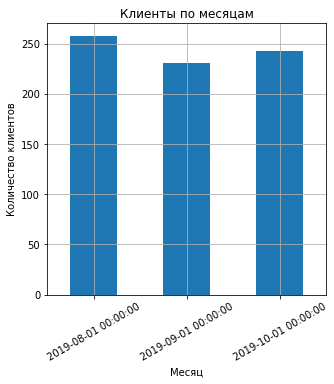

In [50]:
id_month = clients.groupby('month_start').agg({'user_id':'nunique'})
ax = id_month.plot(kind='bar', figsize=(5, 5), legend=False, grid=True)
plt.xticks(rotation=30)
plt.title('Клиенты по месяцам')
plt.xlabel('Месяц') 
plt.ylabel('Количество клиентов')
plt.show()

In [51]:
id_month.style.background_gradient(cmap=cm)

,user_id
month_start,
2019-08-01 00:00:00,258
2019-09-01 00:00:00,231
2019-10-01 00:00:00,243


In [52]:
month_id = clients.groupby(['month_start','tariff_plan'])['user_id'].count().unstack()
month_id.style.background_gradient(cmap=cm)

tariff_plan,A,B,C
month_start,,,
2019-08-01 00:00:00,26,91,141
2019-09-01 00:00:00,16,77,138
2019-10-01 00:00:00,34,93,116


Тариф А больше всего подключили в 10 месяце,тариф В в 10 и 8, тариф С в 8 и 9.По общему числу подключений больше в 8 месяце.

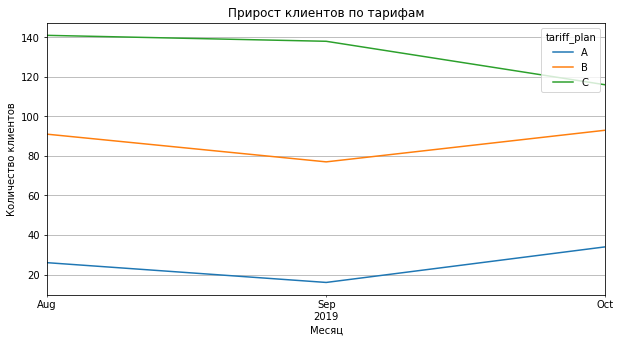

In [53]:
ax = month_id.plot(kind='line', figsize=(10,5), grid=True)
plt.title('Прирост клиентов по тарифам')
plt.xlabel('Месяц') 
plt.ylabel('Количество клиентов')
plt.show()

В данных 3 месяца с августа по октябрь,ноября в них нет,получается клиенты регистрировались только первые три месяца. В сентябре во всех тарифах виден спад,в октябре спад продолжатеся в тарифе С,а в тарифах А и В идет прирост.Выходит, что данные по коммуникациям клиентов за 4 месяца, при этом сами клиенты регистрировались только первые три месяца.

In [54]:
#len(np.intersect1d(clients.query('tariff_plan == "B"')['user_id'].unique(),\
#                    clients.query('tariff_plan == "C"')['user_id'].unique()))

In [55]:
df.user_id.nunique()

287

Видимо у нас логи не по всем клиентам, а у нас только какая-то выборка 287 из 732 клиентов.

In [56]:
df.operator_id.nunique()

1083

Всего операторов 1083.

In [57]:
id_month = df.groupby('month').agg({'user_id':'nunique'})
id_month.style.background_gradient(cmap=cm)

,user_id
month,
2019-08-01 00:00:00,67
2019-09-01 00:00:00,157
2019-10-01 00:00:00,237
2019-11-01 00:00:00,242


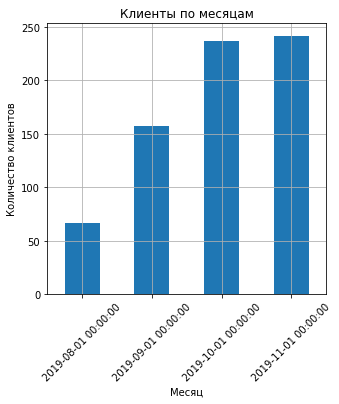

In [58]:
ax = id_month.plot(kind='bar', figsize=(5, 5), legend=False, grid=True)
plt.xticks(rotation=45)
plt.title('Клиенты по месяцам')
plt.xlabel('Месяц') 
plt.ylabel('Количество клиентов')
plt.show()

В октябре(237) и ноябре(242) большее количество клиентов.В сентябре 157,в августе 67.

In [59]:
id_direction = df.groupby('direction').agg({'user_id':'nunique'})
id_direction

,user_id
direction,
in,271
out,218


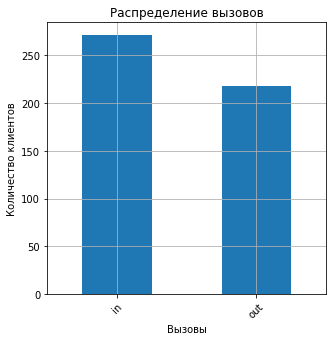

In [60]:
ax = id_direction.plot(kind='bar', figsize=(5, 5), legend=False, grid=True)
plt.xticks(rotation=45)
plt.title('Распределение вызовов')
plt.xlabel('Вызовы') 
plt.ylabel('Количество клиентов')
plt.show()

271 входящий вызов,218 исходящих вызовов по клиентам.

In [61]:
id_internal = df.groupby('internal').agg({'user_id':'nunique'})
id_internal

,user_id
internal,
False,287
True,156


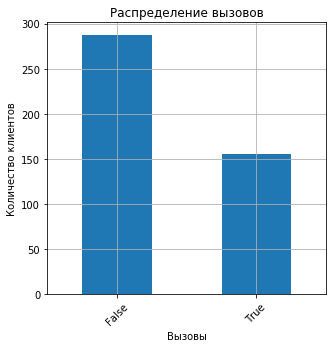

In [62]:
ax = id_internal.plot(kind='bar', figsize=(5, 5), legend=False, grid=True)
plt.xticks(rotation=45)
plt.title('Распределение вызовов')
plt.xlabel('Вызовы') 
plt.ylabel('Количество клиентов')
plt.show()

Внутренних вызовов 156,внешних 287.

In [63]:
is_missed_call = df.groupby('is_missed_call').agg({'user_id':'nunique'})
is_missed_call

,user_id
is_missed_call,
False,284
True,230


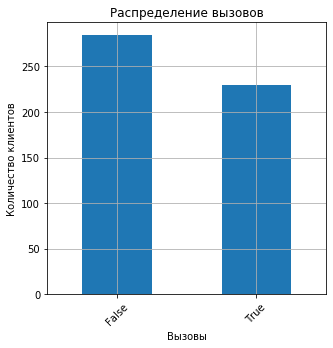

In [64]:
ax = is_missed_call.plot(kind='bar', figsize=(5, 5), legend=False, grid=True)
plt.xticks(rotation=45)
plt.title('Распределение вызовов')
plt.xlabel('Вызовы') 
plt.ylabel('Количество клиентов')
plt.show()

Принятых вызовов 284,пропущенных 230.

In [65]:
total_call_duration = df.groupby(['date', 'operator_id'])['total_call_duration', 'call_duration'].sum()
total_call_duration.describe()

,total_call_duration,call_duration
count,19263.000000,19263.000000
mean,36.148212,28.204485
std,50.968677,40.502793
min,0.000000,0.000000
25%,4.000000,3.000000
50%,15.000000,12.000000
75%,48.000000,36.000000
max,487.000000,420.000000


Длительность звонка с учётом времени ожидания среднее 36 мин,медиана 15 мин,максимум 487мин.
Длительность звонка без учёта времени ожидания среднее 28 мин,медиана 12 мин,максимум 420мин.

Из таблицы clients:

Данные за период 2019-08-01 - 2019-11-27(почти 4 месяца).
В таблице с тарифами 732 клиента,а со звонками 287 клиентов.Видимо у нас какая-то выборка.
Лидер по количеству клиентов тариф С(395),потом В(261) и С(76).
Тариф А больше всего подключили в 10 месяце,тариф В в 10 и 8, тариф С в 8 и 9.По общему числу подключений больше в 8 месяце.
В данных 3 месяца с августа по октябрь,ноября в них нет,получается клиенты регистрировались только первые три месяца. В сентябре во всех тарифах виден спад,в октябре спад продолжатеся в тарифе С,а в тарифах А и В идет прирост.

Из таблицы df:

Всего операторов 1083.
В октябре(237) и ноябре(242) большее количество клиентов.В сентябре 157,в августе 67.
271 входящий вызов,218 исходящих вызовов по клиентам.
Внутренних вызовов 156,внешних 287.
Принятых вызовов 284,пропущенных 230.
Длительность звонка с учётом времени ожидания среднее 36 мин,медиана 15 мин,максимум 487мин.
Длительность звонка без учёта времени ожидания среднее 28 мин,медиана 12 мин,максимум 420мин.

In [66]:
df.groupby('is_missed_call').agg({'calls_count':'sum'})

,calls_count
is_missed_call,
False,320981
True,178304


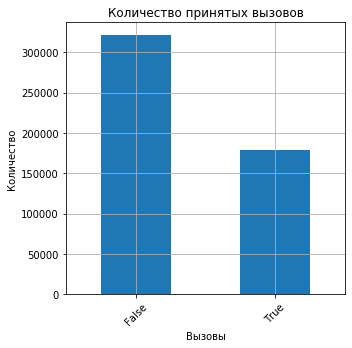

In [67]:
ax = df.groupby('is_missed_call').agg({'calls_count':'sum'}).plot(kind='bar', figsize=(5, 5), legend=False, grid=True)
plt.xticks(rotation=45)
plt.title('Количество принятых вызовов')
plt.xlabel('Вызовы') 
plt.ylabel('Количество')
plt.show()

# Клиенты,которые ушли.

In [68]:
data['month'] = data['date'].dt.month

In [69]:
month_user = data.groupby('user_id').agg({'month':'max'})\
                                             .rename(columns={'month':'month_user'})\
                                             .reset_index()
id_10 = month_user.query('month_user <= 10')
len(id_10)

46

In [70]:
id_46 = id_10.merge(clients, on='user_id', how='left')

In [71]:
id_46['user_id']

0     166399
1     166481
2     166507
3     166533
4     166585
5     166609
6     166666
7     166671
8     166726
9     166727
10    166874
11    166884
12    166908
13    166936
14    166941
15    166946
16    166955
17    166958
18    166993
19    167009
20    167011
21    167012
22    167053
23    167110
24    167113
25    167122
26    167124
27    167125
28    167130
29    167141
30    167144
31    167189
32    167244
33    167285
34    167288
35    167474
36    167530
37    167551
38    167626
39    167645
40    167682
41    167759
42    167819
43    168025
44    168093
45    168307
Name: user_id, dtype: int64

In [72]:
month_id.style.background_gradient(cmap=cm)

tariff_plan,A,B,C
month_start,,,
2019-08-01 00:00:00,26,91,141
2019-09-01 00:00:00,16,77,138
2019-10-01 00:00:00,34,93,116


In [73]:
tariff_id = id_46.groupby(['month_start','tariff_plan'])['user_id'].count().unstack()
tariff_id.style.background_gradient(cmap=cm)

tariff_plan,A,B,C
month_start,,,
2019-08-01 00:00:00,2,6,15
2019-09-01 00:00:00,2,8,9
2019-10-01 00:00:00,nan,2,2


In [74]:
tariff = id_46.groupby('tariff_plan').agg({'user_id':'nunique'})
tariff

,user_id
tariff_plan,
A,4
B,16
C,26


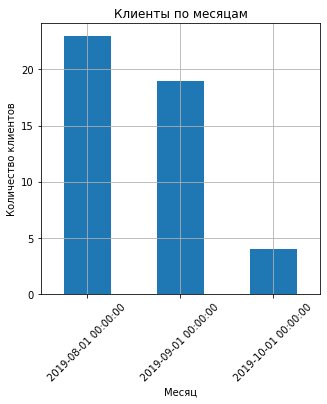

In [75]:
month = id_46.groupby('month_start').agg({'user_id':'nunique'})
ax = month.plot(kind='bar', figsize=(5, 5), legend=False, grid=True)
plt.xticks(rotation=45)
plt.title('Клиенты по месяцам')
plt.xlabel('Месяц') 
plt.ylabel('Количество клиентов')
plt.show()

In [76]:
month

,user_id
month_start,
2019-08-01,23
2019-09-01,19
2019-10-01,4


Из 46 ушедших:
- Тариф А(5000₽) в 8 месяце из 26 клиентов ушли 2,в 9 месяце пришли 16 и 2 ушли.Всего 4
- Тариф В(2000₽) в 8 месяце из 91 клиентов ушли 6,в 9 месяце пришли 77 и 8 ушли,в 10 месяце пришли 93 и 2 ушли.Всего 16.
- Тариф С(1000₽) в 8 месяце из 141 клиентов ушли 15,в 9 месяце пришли 138 и 9 ушли,в 10 месяце пришли 116 и 2 ушли.Всего 26.
Больше всего клиентов ушло в 8 месяце(23),потом в 9(19) и в 8(4).

In [77]:
user_46 = id_10.merge(df, on='user_id', how='left')

In [78]:
user_46.head()

,user_id,month_user,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,month
0,166399,10,2019-08-14 21:00:00,in,False,886674,False,2.0,2.0,2.0,2019-08-01
1,166399,10,2019-08-22 21:00:00,in,False,886674,False,1.0,1.0,1.0,2019-08-01
2,166399,10,2019-09-01 21:00:00,in,False,886674,False,1.0,1.0,2.0,2019-09-01
3,166399,10,2019-10-01 21:00:00,in,False,886674,False,1.0,1.0,1.0,2019-10-01
4,166399,10,2019-10-06 21:00:00,in,False,886674,False,1.0,1.0,1.0,2019-10-01


In [79]:
direction = user_46.groupby('direction').agg({'user_id':'nunique'})
direction

,user_id
direction,
in,37
out,34


In [80]:
internal = user_46.groupby('internal').agg({'user_id':'nunique'})
internal

,user_id
internal,
False,45
True,20


In [81]:
missed_call = user_46.groupby('is_missed_call').agg({'user_id':'nunique'})
missed_call

,user_id
is_missed_call,
False,44
True,34


In [82]:
total_duration = user_46.groupby(['user_id', 'date', 'operator_id'])\
                         .agg({'total_call_duration' : 'sum','call_duration' : 'sum','calls_count' : 'sum'})
total_duration.mean()

total_call_duration    81.186486
call_duration          57.521622
calls_count            68.563514
dtype: float64

Из 46 ушедших клентов:
- 37 клиентов пользовались входящими вызовами,35 исходящими;
- 21 клиент пользовался внутренними вызовами,46 внешними(все);
- 35 клиентов пропускали вызов;
- Средняя длительность звонка 81 минут с учетом времени ожидания;
- Средняя длительность звонка 57 минут без времени ожидания.

In [83]:
(user_46
 .groupby(['user_id', 'date', 'operator_id'])
 .agg({'total_call_duration' : 'sum',
       'call_duration' : 'sum',
       'calls_count' : 'sum'})
).head()

total_call_duration  call_duration  \
user_id date                operator_id                                       
166399  2019-08-14 21:00:00 886674       2.0                  2.0             
        2019-08-22 21:00:00 886674       1.0                  1.0             
        2019-09-01 21:00:00 886674       2.0                  1.0             
        2019-10-01 21:00:00 886674       1.0                  1.0             
        2019-10-06 21:00:00 886674       1.0                  1.0             

                                         calls_count  
user_id date                operator_id               
166399  2019-08-14 21:00:00 886674       2.0          
        2019-08-22 21:00:00 886674       1.0          
        2019-09-01 21:00:00 886674       1.0          
        2019-10-01 21:00:00 886674       1.0          
        2019-10-06 21:00:00 886674       1.0

Активные пользователи.

In [84]:
df['mont'] = df['month'].dt.month

In [85]:
month_user = df.groupby('user_id').agg({'mont':'max'})\
                                             .rename(columns={'mont':'month_user'})\
                                             .reset_index()
id_11 = month_user.query('month_user == 11')

In [86]:
id_11.user_id.nunique()

242

In [87]:
id_11.head()

,user_id,month_user
0,166377,11
1,166391,11
2,166392,11
4,166405,11
5,166406,11


In [88]:
clients.head()

,user_id,tariff_plan,date_start,month_start
0,166713,A,2019-08-15,2019-08-01
1,166901,A,2019-08-23,2019-08-01
2,168527,A,2019-10-29,2019-10-01
3,167097,A,2019-09-01,2019-09-01
4,168193,A,2019-10-16,2019-10-01


In [89]:
client = clients.merge(id_11,on=['user_id'], how='inner')

In [90]:
client.isna().sum()*100/len(client)

user_id        0.0
tariff_plan    0.0
date_start     0.0
month_start    0.0
month_user     0.0
dtype: float64

In [91]:
client.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242 entries, 0 to 241
Data columns (total 5 columns):
user_id        242 non-null int64
tariff_plan    242 non-null object
date_start     242 non-null datetime64[ns]
month_start    242 non-null datetime64[ns]
month_user     242 non-null int64
dtypes: datetime64[ns](2), int64(2), object(1)
memory usage: 11.3+ KB


In [92]:
df = df.merge(id_11, on=['user_id'], how='inner')
df.isna().sum()*100/len(df)

user_id                0.0
date                   0.0
direction              0.0
internal               0.0
operator_id            0.0
is_missed_call         0.0
calls_count            0.0
call_duration          0.0
total_call_duration    0.0
month                  0.0
mont                   0.0
month_user             0.0
dtype: float64

Количество операторов для каждого клиента по месяцам для исходящих звонков.

In [93]:
unique_operator = (df[df['direction']=='out']).groupby(['user_id','month'])\
                                                                    .agg({'operator_id':'nunique'})\
                                                                    .rename(columns={'operator_id':'nunique_operator'})\
                                                                    .reset_index()
unique_operator.describe()

,user_id,nunique_operator
count,458.000000,458.000000
mean,167273.360262,3.200873
std,571.475624,4.216649
min,166377.000000,1.000000
25%,166782.000000,1.000000
50%,167178.000000,2.000000
75%,167724.250000,3.000000
max,168606.000000,38.000000


Среднее по операторам 3,медиана 2,максимум 38.

In [94]:
#dt = df[(df['direction']!='in') & (df['is_missed_call']!=True)]

Внутрение звонки по месяцам и клиентам.

In [95]:
internal = (df[df['internal']==True]).groupby(['user_id','month'])\
                        .agg({'calls_count':'sum', 'call_duration':'sum', 'total_call_duration':'sum'})\
                        .rename(columns={'calls_count':'internal_calls_count', 'call_duration':'internal_call_duration',
                        'total_call_duration':'internal_total_duration'}).reset_index()
internal.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,266.0,167255.661654,593.370658,166377.0,166732.0,167176.0,167715.00,168606.0
internal_calls_count,266.0,50.266917,131.459070,1.0,2.0,5.5,26.00,1151.0
internal_call_duration,266.0,42.172932,140.378250,0.0,0.0,1.0,9.00,1312.0
internal_total_duration,266.0,52.665414,166.959595,0.0,1.0,3.0,17.75,1560.0


По внутреним звонкам:
- Количество звонков среднее 50,медиана 5;
- Длительность звонков без ожидания среднее 42,медиана 1;
- Длительность звонков с ожиданием среднее 52,медиана 3.

Внешние звонки по месяцам и клиентам.

In [96]:
fl_internal = (df[df['internal']==False]).groupby(['user_id','month'])\
                        .agg({'calls_count':'sum', 'call_duration':'sum', 'total_call_duration':'sum'})\
                        .rename(columns={'calls_count':'fl_calls_count', 'call_duration':'fl_calls_duration',
                        'total_call_duration':'fl_total_duration'}).reset_index()
fl_internal.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,618.0,167323.893204,593.646224,166377.0,166813.00,167217.5,167837.25,168606.0
fl_calls_count,618.0,622.071197,2465.305211,1.0,9.25,59.5,383.25,46853.0
fl_calls_duration,618.0,723.224919,2592.688220,0.0,12.25,88.0,512.25,50103.0
fl_total_duration,618.0,909.640777,3357.115009,0.0,16.00,115.0,622.50,66171.0


По внешним звонкам:
- Количество звонков среднее 622,медиана 59;
- Длительность звонков без ожидания среднее 723,медиана 88;
- Длительность звонков с ожиданием среднее 909,медиана 115.

Cоединим все в одну таблицу.

In [97]:
client = client.merge(unique_operator, on=['user_id'], how='left')
client = client.merge(internal, on=['month', 'user_id'], how='left')
client = client.merge(fl_internal, on=['month', 'user_id'], how='left')

In [98]:
client.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 516 entries, 0 to 515
Data columns (total 13 columns):
user_id                    516 non-null int64
tariff_plan                516 non-null object
date_start                 516 non-null datetime64[ns]
month_start                516 non-null datetime64[ns]
month_user                 516 non-null int64
month                      458 non-null datetime64[ns]
nunique_operator           458 non-null float64
internal_calls_count       249 non-null float64
internal_call_duration     249 non-null float64
internal_total_duration    249 non-null float64
fl_calls_count             457 non-null float64
fl_calls_duration          457 non-null float64
fl_total_duration          457 non-null float64
dtypes: datetime64[ns](3), float64(7), int64(2), object(1)
memory usage: 56.4+ KB


In [99]:
client.isna().sum()*100/len(client)

user_id                    0.000000 
tariff_plan                0.000000 
date_start                 0.000000 
month_start                0.000000 
month_user                 0.000000 
month                      11.240310
nunique_operator           11.240310
internal_calls_count       51.744186
internal_call_duration     51.744186
internal_total_duration    51.744186
fl_calls_count             11.434109
fl_calls_duration          11.434109
fl_total_duration          11.434109
dtype: float64

In [100]:
client = client.fillna(0)

In [101]:
client.isna().sum()*100/len(client)

user_id                    0.0
tariff_plan                0.0
date_start                 0.0
month_start                0.0
month_user                 0.0
month                      0.0
nunique_operator           0.0
internal_calls_count       0.0
internal_call_duration     0.0
internal_total_duration    0.0
fl_calls_count             0.0
fl_calls_duration          0.0
fl_total_duration          0.0
dtype: float64

In [102]:
client.user_id.nunique()

242

In [103]:
client.head()

,user_id,tariff_plan,date_start,month_start,month_user,month,nunique_operator,internal_calls_count,internal_call_duration,internal_total_duration,fl_calls_count,fl_calls_duration,fl_total_duration
0,166713,A,2019-08-15,2019-08-01,11,2019-09-01 00:00:00,1.0,2.0,4.0,4.0,10.0,24.0,26.0
1,166713,A,2019-08-15,2019-08-01,11,2019-10-01 00:00:00,2.0,0.0,0.0,0.0,16.0,16.0,21.0
2,166713,A,2019-08-15,2019-08-01,11,2019-11-01 00:00:00,1.0,0.0,0.0,0.0,20.0,117.0,119.0
3,166901,A,2019-08-23,2019-08-01,11,2019-08-01 00:00:00,4.0,28.0,23.0,30.0,53.0,26.0,31.0
4,166901,A,2019-08-23,2019-08-01,11,2019-09-01 00:00:00,4.0,106.0,98.0,121.0,148.0,261.0,280.0


Cоздадим тариф.

In [104]:
tariff = {'A':5000, 'B':2000, 'C':1000}
client['cost_tariff'] = client['tariff_plan'].map(tariff)

Исходящие звонки внутри сети — бесплатны до 2000 минут в месяц на всех тарифах.

In [105]:
over_limit = {'A':0.1, 'B':0.15, 'C':0.3}
limit = 2000

In [106]:
client['internal_limit'] =  client['internal_total_duration'] - limit

client['cost_internal_call'] = client.apply(lambda x: 
                                                  (over_limit[x.tariff_plan] * x.internal_limit)
                                                      if x.internal_limit > 0
                                                      else 0, axis=1)

Исходящие звонки, кроме внутренних.

In [107]:
over_limits = {'A':0.4, 'B':0.5, 'C':0.7}

In [108]:
client['cost_external_call'] = client.apply(lambda x:(over_limits[x.tariff_plan] * x.fl_total_duration), axis=1)

Доплата за оператора.

In [109]:
cost_operators = 100
client['cost_operators'] = client['nunique_operator'] * cost_operators

Сумма в месяц.

In [110]:
client['total'] = client[[i for i in client if 'cost' in i]].sum(axis=1)

In [111]:
del client['date_start']

In [112]:
tariff_total = client.groupby('tariff_plan').agg({'total':'sum'})
tariff_total

,total
tariff_plan,
A,413957.6
B,565406.5
C,416683.0


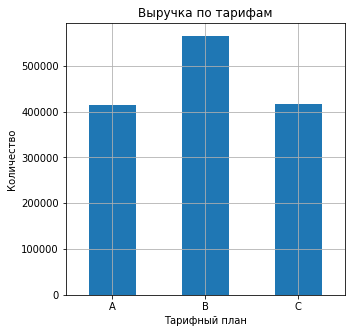

In [113]:
ax = tariff_total.plot(kind='bar', figsize=(5, 5), legend=False, grid=True)
plt.xticks(rotation=0)
plt.title('Выручка по тарифам')
plt.xlabel('Тарифный план') 
plt.ylabel('Количество')
plt.show()

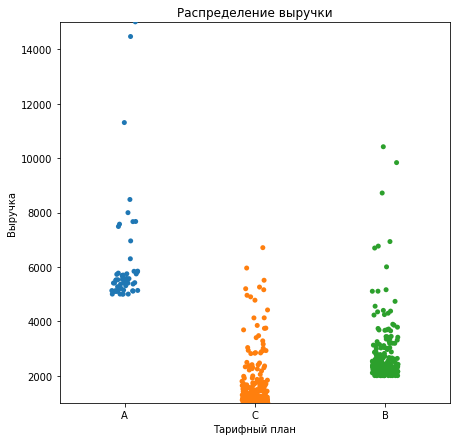

In [114]:
tar = client[['tariff_plan','total']]

plt.figure(figsize=(7, 7))
ax = sns.stripplot(x="tariff_plan", y="total", data=tar)
ax.set(title = 'Распределение выручки', ylabel = 'Выручка', xlabel = 'Тарифный план', ylim=(1000,15000))
plt.show()

Видно,как на цену влияет абоненская плата.

In [115]:
tariff_total['%'] = tariff_total['total'] / tariff_total['total'].sum()
tariff_total

,total,%
tariff_plan,,
A,413957.6,0.296521
B,565406.5,0.405005
C,416683.0,0.298473


На первом месте тариф В-565406.5(40%),потом С-416683(30) и А-413957.6(30).

Определим выгодный тариф для клиента.Создадим функцию.

In [116]:
df = client.copy()

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 516 entries, 0 to 515
Data columns (total 18 columns):
user_id                    516 non-null int64
tariff_plan                516 non-null object
month_start                516 non-null datetime64[ns]
month_user                 516 non-null int64
month                      516 non-null object
nunique_operator           516 non-null float64
internal_calls_count       516 non-null float64
internal_call_duration     516 non-null float64
internal_total_duration    516 non-null float64
fl_calls_count             516 non-null float64
fl_calls_duration          516 non-null float64
fl_total_duration          516 non-null float64
cost_tariff                516 non-null int64
internal_limit             516 non-null float64
cost_internal_call         516 non-null int64
cost_external_call         516 non-null float64
cost_operators             516 non-null float64
total                      516 non-null float64
dtypes: datetime64[ns](1), float64

In [118]:
over_limit = {'A':0.1, 'B':0.15, 'C':0.3}
over_limits = {'A':0.4, 'B':0.5, 'C':0.7}
tariff = {'A':5000, 'B':2000, 'C':1000}
limit = 2000
cost_operators = 100

Функция считает расходы по каждому тарифу для клиента за один месяц и создает самый дешевый тариф для клиента.

In [119]:
def get_best_tariff(df=df):
    user_list = []
    best_tariff_list = []

    for user in df.user_id.unique():
        total_by_user = {i:[] for i in over_limit.keys()}
        temp = df[df['user_id']==user]        
        def in_one_user_df(x):
            cost_by_tariff = {}
            for i in over_limit.keys():
                external = over_limits[i]*x.fl_total_duration
                if x.internal_limit > 0:
                    internal = over_limit[i]*x.internal_limit
                else:
                    internal = 0
                total = external + internal + tariff[i]
                cost_by_tariff[i] = round(total,2)

            for key, value in cost_by_tariff.items():
                total_by_user[key].append(value)
                
        temp['no_column_no_doubt'] = temp.apply(in_one_user_df, axis=1)

        total_by_user = {key:sum(value) for key, value in total_by_user.items()}

        best_tariff = [key for key, value in total_by_user.items() if value == min(total_by_user.values())][0]

        user_list.append(user)
        best_tariff_list.append(best_tariff)

    df_best_tariff = pd.DataFrame({'user_id':user_list, 'best_tariff':best_tariff_list})
    return df_best_tariff

In [120]:
df_best_tariff = get_best_tariff()
df_best_tariff.head()

,user_id,best_tariff
0,166713,C
1,166901,C
2,168193,C
3,168252,B
4,168253,C


In [121]:
#df_best_tariff[df_best_tariff['user_id'=='166481']]

In [122]:
df_best_tariff.groupby('best_tariff').agg({'user_id':'nunique'})

,user_id
best_tariff,
A,1
B,6
C,235


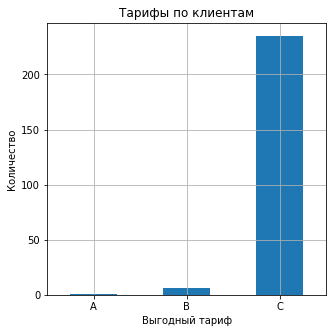

In [123]:
ax = df_best_tariff.groupby('best_tariff').agg({'user_id':'nunique'}).plot(kind='bar', figsize=(5, 5), legend=False, grid=True)
plt.xticks(rotation=0)
plt.title('Тарифы по клиентам')
plt.xlabel('Выгодный тариф') 
plt.ylabel('Количество')
plt.show()

Больше всего предлагает тариф С-235.

Cравним тарифы.

In [124]:
df = df.merge(df_best_tariff, on='user_id', how='left')

In [125]:
df.head()

,user_id,tariff_plan,month_start,month_user,month,nunique_operator,internal_calls_count,internal_call_duration,internal_total_duration,fl_calls_count,fl_calls_duration,fl_total_duration,cost_tariff,internal_limit,cost_internal_call,cost_external_call,cost_operators,total,best_tariff
0,166713,A,2019-08-01,11,2019-09-01 00:00:00,1.0,2.0,4.0,4.0,10.0,24.0,26.0,5000,-1996.0,0,10.4,100.0,5110.4,C
1,166713,A,2019-08-01,11,2019-10-01 00:00:00,2.0,0.0,0.0,0.0,16.0,16.0,21.0,5000,-2000.0,0,8.4,200.0,5208.4,C
2,166713,A,2019-08-01,11,2019-11-01 00:00:00,1.0,0.0,0.0,0.0,20.0,117.0,119.0,5000,-2000.0,0,47.6,100.0,5147.6,C
3,166901,A,2019-08-01,11,2019-08-01 00:00:00,4.0,28.0,23.0,30.0,53.0,26.0,31.0,5000,-1970.0,0,12.4,400.0,5412.4,C
4,166901,A,2019-08-01,11,2019-09-01 00:00:00,4.0,106.0,98.0,121.0,148.0,261.0,280.0,5000,-1879.0,0,112.0,400.0,5512.0,C


In [126]:
df_recommendation = df.groupby(['user_id','tariff_plan']).agg({'best_tariff':'unique'}).reset_index()

Создадим функцию,которая считает более выгодный тариф.

In [127]:
def get_recommendation(x):
    dict_params = {'A':3,'B':2, 'C':1}
    dict_params_down = dict(reversed(item) for item in dict_params.items())
    current_tariff = dict_params[x.tariff_plan]
    if (list(x.tariff_plan) == x.best_tariff) :
        return 'nothing'
    else:
        best_tariff = dict_params[str(x.best_tariff[0])]
        if current_tariff > best_tariff:
            return 'decrease_'+ dict_params_down[best_tariff]
        else:
            return 'increase_'+ dict_params_down[best_tariff]

In [128]:
df_recommendation['recommedation'] = df_recommendation.apply(get_recommendation, axis=1)

In [129]:
df_recommendation.drop(['best_tariff'], axis=1, inplace=True)

In [130]:
df_recommendation.head()

,user_id,tariff_plan,recommedation
0,166377,B,decrease_C
1,166391,C,nothing
2,166392,C,nothing
3,166405,B,nothing
4,166406,B,decrease_C


Посмотрим на оптимальные тарифы.

In [131]:
df_recommendation['is_tariff_optimal'] = np.where(df_recommendation['recommedation']=='nothing',
                                                  'optimal','not_optimal')
optimal = df_recommendation.groupby('is_tariff_optimal').agg({'user_id':'nunique'})\
                                                     .rename(columns={'user_id':'cnt_users'})\
                                                     .reset_index()

optimal['share'] = optimal['cnt_users'] / optimal['cnt_users'].sum()

In [132]:
optimal

,is_tariff_optimal,cnt_users,share
0,not_optimal,110,0.454545
1,optimal,132,0.545455


132(54,5%) клиентов с оптимальным тарифным планом,110(45,5%) не оптимальный.

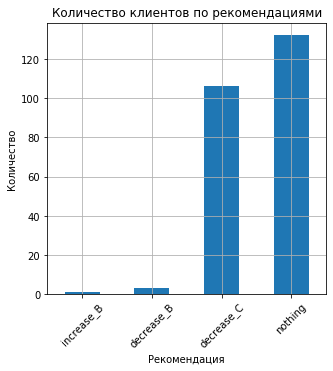

In [133]:
rec = df_recommendation.groupby('recommedation').agg({'user_id':'nunique'})\
                                                .rename(columns={'user_id':'cnt_users'})\
                                                .sort_values('cnt_users')
ax = rec.plot(kind='bar', figsize=(5, 5), legend=False, grid=True)
plt.xticks(rotation=45)
plt.title('Количество клиентов по рекомендациями')
plt.xlabel('Рекомендация') 
plt.ylabel('Количество')
plt.show()

In [134]:
rec

,cnt_users
recommedation,
increase_B,1
decrease_B,3
decrease_C,106
nothing,132


В понижении тарифа до уровня В нуждаются 3 клиента,в повышении до уровня В 1.

В понижении тарифа до уровня С нкждаются 106 клиентов.

Оптимальный у 132.

Разделим на 2 рекомендации.

In [135]:
df_recommendation[['action', 'optimal_tariff']] = df_recommendation['recommedation'].str.split('_', expand=True)
df_recommendation.head()

,user_id,tariff_plan,recommedation,is_tariff_optimal,action,optimal_tariff
0,166377,B,decrease_C,not_optimal,decrease,C
1,166391,C,nothing,optimal,nothing,None
2,166392,C,nothing,optimal,nothing,None
3,166405,B,nothing,optimal,nothing,None
4,166406,B,decrease_C,not_optimal,decrease,C


In [136]:
df_recommendation.loc[df_recommendation['action']=='nothing','optimal_tariff'] = df_recommendation['tariff_plan']

In [137]:
df_recommendation.head()

,user_id,tariff_plan,recommedation,is_tariff_optimal,action,optimal_tariff
0,166377,B,decrease_C,not_optimal,decrease,C
1,166391,C,nothing,optimal,nothing,C
2,166392,C,nothing,optimal,nothing,C
3,166405,B,nothing,optimal,nothing,B
4,166406,B,decrease_C,not_optimal,decrease,C


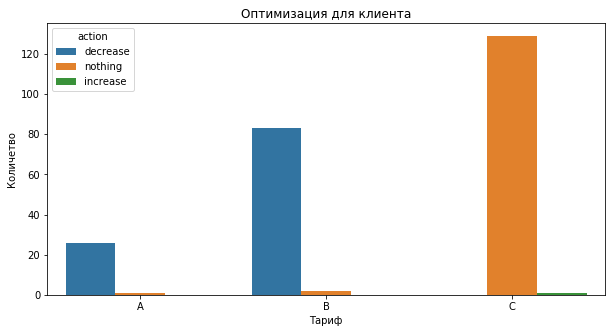

In [138]:
action = df_recommendation.groupby(['tariff_plan','action']).agg({'user_id':'nunique'})\
                                                          .rename(columns={'user_id':'cnt_users'})\
                                                          .reset_index()
plt.figure(figsize=(10, 5)) 
ax = sns.barplot(x='tariff_plan', y='cnt_users', hue='action', data=action)
ax.set(title='Оптимизация для клиента', xlabel='Тариф', ylabel='Количетво')
plt.show()

In [139]:
action

,tariff_plan,action,cnt_users
0,A,decrease,26
1,A,nothing,1
2,B,decrease,83
3,B,nothing,2
4,C,increase,1
5,C,nothing,129


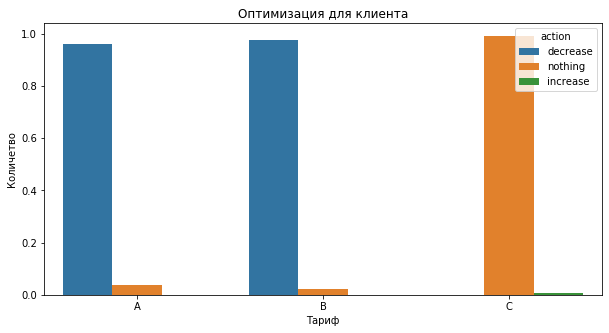

In [140]:
opt = ((df_recommendation.groupby(['tariff_plan','action']).agg({'user_id':'nunique'})/
                                df_recommendation.groupby('tariff_plan').agg({'user_id':'nunique'}))).reset_index()
plt.figure(figsize=(10, 5)) 
ax = sns.barplot(x='tariff_plan', y='user_id', hue='action', data=opt)
ax.set(title='Оптимизация для клиента', xlabel='Тариф', ylabel='Количетво')
plt.show()

In [141]:
opt

,tariff_plan,action,user_id
0,A,decrease,0.962963
1,A,nothing,0.037037
2,B,decrease,0.976471
3,B,nothing,0.023529
4,C,increase,0.007692
5,C,nothing,0.992308


In [142]:
op = df_recommendation.groupby('action').agg({'user_id':'nunique'}).rename(columns={'user_id':'cnt_users'}).reset_index()

In [143]:
op['share'] = op['cnt_users'] / (op['cnt_users'].sum())
op

,action,cnt_users,share
0,decrease,109,0.450413
1,increase,1,0.004132
2,nothing,132,0.545455


Понижение:
- Для общего числа будет оптимально 45%(109 клиента) перехода.
- Для тарифа А будет оптимально 96%(26 клиентов) перехода.
- Для тарифа В будет оптимально 97%(83 клиентов) перехода.

Повышение:
- Для общего числа будет оптимально (1 клиентов) перехода.
- Для тарифа С будет оптимально (1 клиентов) перехода.

Оптимальный тариф:
- для общего числа будет оптимально 54%(132 клиентов) перехода.
- Для тарифа В будет оптимально 2%(2 клиентов) перехода.
- Для тарифа С будет оптимально 99%(129 клиентов) перехода.

Потеря выручки.

In [144]:
df.drop(['best_tariff'], axis=1, inplace=True)

In [145]:
df = df.merge(df_recommendation[['user_id','is_tariff_optimal','action','optimal_tariff']],on='user_id', how='left')

In [146]:
df['cost_tariff_monthly_optimal'] = df['optimal_tariff'].map(tariff)

In [147]:
df['cost_internal_call_optimal'] = df.apply(lambda x:
                                            round(over_limit[x.optimal_tariff] * x.internal_limit,2)
                                                    if x.internal_limit > 0
                                                    else 0, axis=1)

df['cost_external_call_optimal'] = df.apply(lambda x: round(over_limits[x.optimal_tariff] * x.fl_total_duration,2), axis=1)

df['cost_all_total_optimal'] = (df['cost_operators'] + df['cost_tariff_monthly_optimal'] + 
                                df['cost_internal_call_optimal'] + df['cost_external_call_optimal'])

Выручка за весь период.

In [148]:
before = df['total'].sum()
before

1396047.1

Выручка после перехода.

In [149]:
after = df['cost_all_total_optimal'].sum()
after

1017474.3

Относительное различие.

In [150]:
dif = (before - after) / before * 100
dif

27.117480491883118

Выручка после оптимизации на графиках.

In [151]:
df.groupby('tariff_plan').agg({'cost_all_total_optimal':'sum'})

,cost_all_total_optimal
tariff_plan,
A,204165.8
B,396995.1
C,416313.4


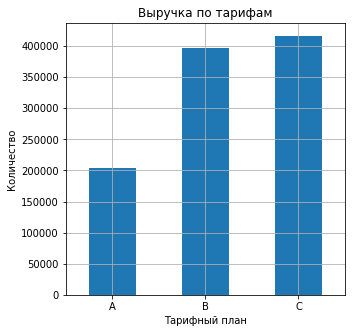

In [152]:
ax = df.groupby('tariff_plan').agg({'cost_all_total_optimal':'sum'}).plot(kind='bar', figsize=(5, 5), legend=False, grid=True)
plt.xticks(rotation=0)
plt.title('Выручка по тарифам')
plt.xlabel('Тарифный план') 
plt.ylabel('Количество')
plt.show()

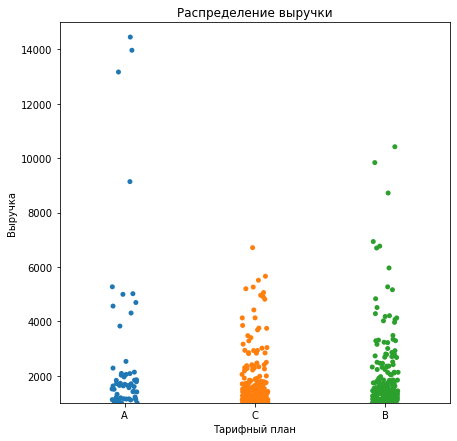

In [153]:
plt.figure(figsize=(7, 7))
ax = sns.stripplot(x="tariff_plan", y="cost_all_total_optimal", data=df)
ax.set(title = 'Распределение выручки', ylabel = 'Выручка', xlabel = 'Тарифный план', ylim=(1000,15000))
plt.show()

Потеряется 27% выручки. Выручка до 1396047 и после 1017474.

- Проверка гипотезы.
H0(нуливая гипотеза) - средняя выручка не различается. 

H1(альтернотивная гипотеза) - средняя выручка различается. 

Пороговое значение alpha (критический уровень статистической значимости) зададим 5%.Признаю 5%-ю вероятность слишком малой и на этом основании отвергаете нулевую гипотезу.

In [154]:
alpha = 0.05 

results = st.ttest_ind(df['total'], df['cost_all_total_optimal'])

print('p-значение: {0:.2f}'.format(results.pvalue))

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.00
Отвергаем нулевую гипотезу


Средняя выручка отличается.Отвергаем нулевую гипотезу.

H0(нуливая гипотеза) - выручка в тарифе А не отличается от тарифа В. 

H1(альтернотивная гипотеза) - выручка в тарифе А отличается от тарифа В. 

Пороговое значение alpha (критический уровень статистической значимости) зададим 5%.Признаю 5%-ю вероятность слишком малой и на этом основании отвергаете нулевую гипотезу.

In [155]:
alpha = 0.05

tar_A = df.query("tariff_plan == 'A'")['cost_all_total_optimal']
tar_B = df.query("tariff_plan == 'B'")['cost_all_total_optimal']

results = st.ttest_ind(tar_A, tar_B)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.0005457094604505786
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу.Выручка в тарифах А и В различается.

## Вывод.

Данные за период 2019-08-01 - 2019-11-27(почти 4 месяца)
Всего клиентов за весь период 290,активных за послений месяц 244. -46 клиентов(15.8%).
Тариф А больше всего подключили в 10 месяце,тариф В в 10 и 8, тариф С в 8 и 9.По общему числу подключений больше в 8 месяце.

Из 46 ушедших:

- Тариф А(5000₽) в 8 месяце из 26 клиентов ушли 2,в 9 месяце пришли 16 и 2 ушли.Всего 4
- Тариф В(2000₽) в 8 месяце из 91 клиентов ушли 6,в 9 месяце пришли 77 и 8 ушли,в 10 месяце пришли 93 и 2 ушли.Всего 16.
- Тариф С(1000₽) в 8 месяце из 141 клиентов ушли 15,в 9 месяце пришли 138 и 9 ушли,в 10 месяце пришли 116 и 2 ушли.Всего 26. Больше всего клиентов ушло в 8 месяце(23),потом в 9(19) и в 8(4).
- 37 клиентов пользовались входящими вызовами,35 исходящими;
- 21 клиент пользовался внутренними вызовами,46 внешними(все);
- 35 клиентов пропускали вызов;
- длительность звонка среднее 2 минуты,медиана 4 минуты,минимум 1 минута,максимум 42 минут
- длительность звонка с ожиданием среднее 4 минуты,медиана 2 минуты,минимум 1 минута,максимум 45 минут;
- количество звонков среднее 4,медиана 2,минимум 1,максимум 44.

# Статистика по клиентам,которые переплачивают

132(54,5%) клиента с оптимальным тарифным планом,110(45,5%) не оптимальный.

В понижении тарифа до уровня В нуждаются 3 клиента;

В повышении до уровня В нуждается 1 клиент;

В понижении тарифа до уровня С нуждаются 106 клиентов.

- Выручка до 1396047 и после 1017474 оптимизации.Потеряется 27% выручки. 
- На первом месте тариф В-565406.5(40%),потом С-416683(30) и А-413957.6(30).
Клиенты по тарифам:
- A	1
- B	6
- C	235

Оптимизация тарифов.

Для тарифа А:
- будет оптимально понижение 96%(26 клиентов) 
Для тарифа В:
- будет оптимально понижение 97%(83 клиента)
- оптимальный 2%(2 клиента)
Для тарифа С:
- будет оптимально повышение для 1 клиента
- оптимальный для 1 клиента.

Средняя выручка различается - 27%.